In [1]:
import pandas_datareader as pdr
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [2]:
api_key = 'eeeb3a6e5c1f42f59906cc00309b78393a93c9db'
df = pdr.get_data_tiingo('AAPL', api_key = api_key)

In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-04-21 00:00:00+00:00,105.97,106.93,105.52,106.93,31552525,24.636619,24.859807,24.532000,24.859807,126210100,0.0,1.0
1,AAPL,2016-04-22 00:00:00+00:00,105.68,106.48,104.62,105.01,33683121,24.569198,24.755188,24.322762,24.413432,134732484,0.0,1.0
2,AAPL,2016-04-25 00:00:00+00:00,105.08,105.65,104.51,105.00,28031588,24.429706,24.562224,24.297189,24.411107,112126352,0.0,1.0
3,AAPL,2016-04-26 00:00:00+00:00,104.35,105.30,103.91,103.91,56016165,24.259991,24.480853,24.157697,24.157697,224064660,0.0,1.0
4,AAPL,2016-04-27 00:00:00+00:00,97.82,98.71,95.68,96.00,114602142,22.741853,22.948766,22.244331,22.318727,458408568,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-04-13 00:00:00+00:00,134.43,134.66,131.930,132.44,91266545,134.43,134.66,131.930,132.44,91266545,0.0,1.0
1253,AAPL,2021-04-14 00:00:00+00:00,132.03,135.00,131.655,134.94,87222782,132.03,135.00,131.655,134.94,87222782,0.0,1.0
1254,AAPL,2021-04-15 00:00:00+00:00,134.50,135.00,133.640,133.82,89347102,134.50,135.00,133.640,133.82,89347102,0.0,1.0
1255,AAPL,2021-04-16 00:00:00+00:00,134.16,134.67,133.280,134.30,84922386,134.16,134.67,133.280,134.30,84922386,0.0,1.0
1256,AAPL,2021-04-19 00:00:00+00:00,134.84,135.47,133.340,133.51,94264215,134.84,135.47,133.340,133.51,94264215,0.0,1.0


In [8]:
df1 = df.reset_index()['close']

In [9]:
df1

0       105.97
1       105.68
2       105.08
3       104.35
4        97.82
         ...  
1252    134.43
1253    132.03
1254    134.50
1255    134.16
1256    134.84
Name: close, Length: 1257, dtype: float64

In [10]:
df1.shape

(1257,)

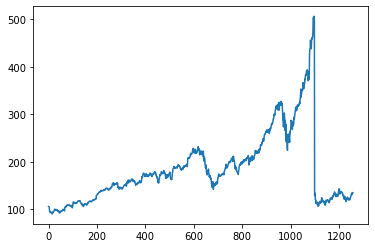

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

## Data Preprocessing

In [12]:
print(df1.shape)

(1257,)


In [13]:
import numpy as np
df1 = np.array(df1).reshape(-1, 1)
print(df1.shape)

(1257, 1)


In [14]:
df1

array([[105.97],
       [105.68],
       [105.08],
       ...,
       [134.5 ],
       [134.16],
       [134.84]])

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(df1)

In [16]:
df1

array([[0.03759471],
       [0.03689717],
       [0.035454  ],
       ...,
       [0.10621768],
       [0.10539988],
       [0.10703548]])

In [17]:
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size

train_data= df1[0:training_size,:]
test_data = df1[training_size:len(df1), :1]

In [18]:
test_data.shape

(440, 1)

In [19]:
def create_dataset(dataset, time_step = 10):
    dataX, dataY = [] , []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0] # i = 0,1,2,...,len(dataset) - time_step - 1
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [21]:
print(
X_train.shape,
y_train.shape,
'\n\n',
X_test.shape,
y_test.shape
)

(716, 100) (716,) 

 (339, 100) (339,)


In [22]:
# reshape input to be [samples, time_steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [23]:
print(
X_train.shape,
'\n\n',
X_test.shape,
)

(716, 100, 1) 

 (339, 100, 1)


In [24]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]))) # input_shape = time_step * features
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train, y_train, epochs = 100, batch_size = 64)

Epoch 1/100
12/12 [==============================] - 7s 28ms/step - loss: 0.0235
Epoch 2/100
12/12 [==============================] - 0s 28ms/step - loss: 0.0030
Epoch 3/100
12/12 [==============================] - 0s 27ms/step - loss: 0.0017
Epoch 4/100
12/12 [==============================] - 0s 27ms/step - loss: 7.7634e-04
Epoch 5/100
12/12 [==============================] - 0s 27ms/step - loss: 5.0012e-04
Epoch 6/100
12/12 [==============================] - 0s 29ms/step - loss: 4.2877e-04
Epoch 7/100
12/12 [==============================] - 0s 27ms/step - loss: 4.3496e-04
Epoch 8/100
12/12 [==============================] - 0s 27ms/step - loss: 4.0936e-04
Epoch 9/100
12/12 [==============================] - 0s 27ms/step - loss: 3.7869e-04
Epoch 10/100
12/12 [==============================] - 0s 28ms/step - loss: 4.0554e-04
Epoch 11/100
12/12 [==============================] - 0s 28ms/step - loss: 3.8428e-04
Epoch 12/100
12/12 [==============================] - 0s 29ms/step - loss: 

In [28]:
tf.__version__

'2.4.1'

In [40]:
test_predict = model.predict(X_test)

In [41]:
test_predict.shape

(339, 1)

In [42]:
test_predict=scaler.inverse_transform(test_predict)
print(test_predict)

[[266.88895 ]
 [268.20416 ]
 [269.63937 ]
 [271.37643 ]
 [273.72302 ]
 [276.3821  ]
 [278.80472 ]
 [280.65704 ]
 [281.7117  ]
 [282.53165 ]
 [283.24515 ]
 [284.49445 ]
 [286.1269  ]
 [288.01678 ]
 [290.08887 ]
 [292.82745 ]
 [295.5126  ]
 [297.97153 ]
 [299.77173 ]
 [301.35962 ]
 [303.48755 ]
 [306.04684 ]
 [309.4095  ]
 [312.55267 ]
 [314.78775 ]
 [316.4057  ]
 [317.88394 ]
 [318.9726  ]
 [319.75513 ]
 [320.43607 ]
 [320.9166  ]
 [320.07437 ]
 [319.15564 ]
 [319.35504 ]
 [320.59283 ]
 [320.73132 ]
 [319.4534  ]
 [318.38687 ]
 [318.2739  ]
 [319.5065  ]
 [321.04282 ]
 [322.54495 ]
 [323.50034 ]
 [324.71722 ]
 [325.87344 ]
 [326.79144 ]
 [326.65802 ]
 [326.12683 ]
 [325.0941  ]
 [322.92828 ]
 [318.27225 ]
 [310.8415  ]
 [302.68085 ]
 [293.14355 ]
 [283.49954 ]
 [277.8919  ]
 [275.63354 ]
 [277.40793 ]
 [280.87717 ]
 [284.15115 ]
 [283.77444 ]
 [282.08392 ]
 [278.95303 ]
 [272.04565 ]
 [265.86462 ]
 [257.84174 ]
 [249.90535 ]
 [242.49757 ]
 [236.08089 ]
 [229.38965 ]
 [222.26959 ]
 [217.

In [44]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)
print(y_test)

[[270.77 ]
 [271.46 ]
 [275.15 ]
 [279.86 ]
 [280.41 ]
 [279.74 ]
 [280.02 ]
 [279.44 ]
 [284.   ]
 [284.27 ]
 [289.91 ]
 [289.8  ]
 [291.52 ]
 [293.65 ]
 [300.35 ]
 [297.43 ]
 [299.8  ]
 [298.39 ]
 [303.19 ]
 [309.63 ]
 [310.33 ]
 [316.96 ]
 [312.68 ]
 [311.34 ]
 [315.24 ]
 [318.73 ]
 [316.57 ]
 [317.7  ]
 [319.23 ]
 [318.31 ]
 [308.95 ]
 [317.69 ]
 [324.34 ]
 [323.87 ]
 [309.51 ]
 [308.66 ]
 [318.85 ]
 [321.45 ]
 [325.21 ]
 [320.03 ]
 [321.55 ]
 [319.61 ]
 [327.2  ]
 [324.87 ]
 [324.95 ]
 [319.   ]
 [323.62 ]
 [320.3  ]
 [313.05 ]
 [298.18 ]
 [288.08 ]
 [292.65 ]
 [273.52 ]
 [273.36 ]
 [298.81 ]
 [289.32 ]
 [302.74 ]
 [292.92 ]
 [289.03 ]
 [266.17 ]
 [285.34 ]
 [275.43 ]
 [248.23 ]
 [277.97 ]
 [242.21 ]
 [252.86 ]
 [246.67 ]
 [244.78 ]
 [229.24 ]
 [224.37 ]
 [246.88 ]
 [245.52 ]
 [258.44 ]
 [247.74 ]
 [254.81 ]
 [254.29 ]
 [240.91 ]
 [244.93 ]
 [241.41 ]
 [262.47 ]
 [259.43 ]
 [266.07 ]
 [267.99 ]
 [273.25 ]
 [287.05 ]
 [284.43 ]
 [286.69 ]
 [282.8  ]
 [276.93 ]
 [268.37 ]
 [276.1  ]

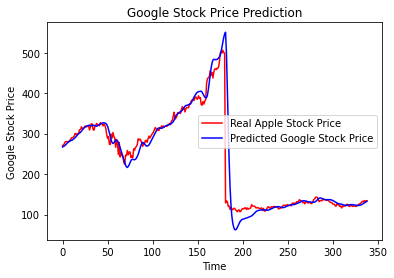

In [45]:
plt.plot(y_test, color = 'red', label = 'Real Apple Stock Price')
plt.plot(test_predict, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()